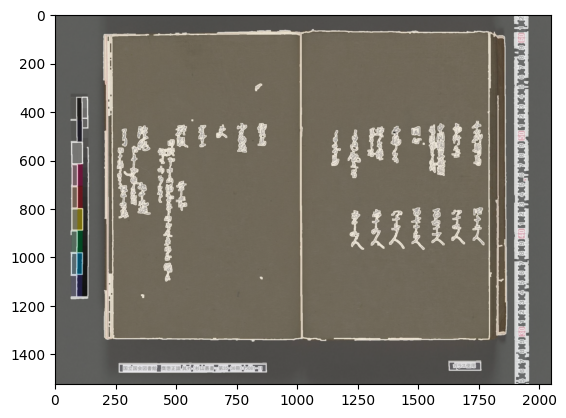

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def auto_crop_using_canny_with_optimizations(image_path, output_path):
    # 读取图像并转换为灰度图
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 使用高斯模糊减少噪声
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # 使用Canny边缘检测（调整阈值以优化检测）
    edges = cv2.Canny(blurred, 30, 120)
    
    # 使用形态学操作连接边缘
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    edges = cv2.dilate(edges, kernel)
    edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
    
    # 叠加边缘检测结果到原图像上
    overlay = cv2.addWeighted(cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR), 0.5, img, 0.5, 0)
    
    # 查找轮廓
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # 找到包含文本区域的最大轮廓
    largest_contour = max(contours, key=cv2.contourArea)
    
    # 计算包围文本区域的边界矩形
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # 裁剪图像
    cropped_img = img[y:y+h, x:x+w]
    
    # 保存裁剪后的图像
    cv2.imwrite(output_path, cropped_img)
    
    # 显示叠加了边缘的图像
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.show()

# 示例调用
auto_crop_using_canny_with_optimizations("C:/Users/david/Desktop/0037_0000.jpg", "0037_0000_cropped.jpg")
